In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import altair as alt
import itertools
import time
import copy
import gc


In [2]:
df = df_train.pivot(index='Date', columns='SecuritiesCode', values='Target').dropna(axis=0)
df.head()

SecuritiesCode      1301      1332      1333      1375      1376      1377  \
Date                                                                         
2020-12-23     -0.000343  0.007143  0.005051 -0.003484 -0.009494  0.011252   
2020-12-24      0.011660 -0.007092  0.007766 -0.015152 -0.008307  0.005563   
2020-12-25      0.003729  0.019048  0.013599  0.008876  0.028351  0.002766   
2020-12-28     -0.003377 -0.004673 -0.007156 -0.007038 -0.013158 -0.013793   
2020-12-29     -0.000339 -0.011737 -0.008108 -0.011223  0.008254 -0.004196   

SecuritiesCode      1379      1381      1407      1413      1414      1417  \
Date                                                                         
2020-12-23      0.002373 -0.003012  0.047536  0.008712  0.005988  0.010721   
2020-12-24     -0.008049  0.015106 -0.016511  0.011364 -0.001984  0.009428   
2020-12-25      0.005728  0.007440  0.007359 -0.018427  0.005964  0.019264   
2020-12-28     -0.009492  0.019202 -0.012499 -0.009158 -0.009881  0.012600   
2020-12-29      0.004792  0.011594  0.003151 -0.027264 -0.008982 -0.023190   

SecuritiesCode      1419      1429      1431      1435      1515      1518  \
Date                                                                         
2020-12-23      0.000692  0.003063 -0.013333  0.023952  0.027687  0.014556   
2020-12-24     -0.006220 -0.010687 -0.001502 -0.035088 -0.023772 -0.002869   
2020-12-25      0.009040  0.003086  0.006015  0.036364 -0.012987  0.041727   
2020-12-28      0.014473 -0.001538  0.000498  0.029240  0.008224 -0.012431   
2020-12-29     -0.004076 -0.013867  0.044821 -0.022727 -0.027732  0.002797   

SecuritiesCode      1605      1662      1663      1712      1716      1719  \
Date                                                                         
2020-12-23      0.008726  0.004724  0.009028  0.014620 -0.011111  0.004249   
2020-12-24     -0.008651 -0.013584  0.000000 -0.005764  0.008989 -0.002821   
2020-12-25     -0.019197  0.008475  0.025465  0.008696  0.107647  0.024045   
2020-12-28     -0.010676 -0.014706  0.000000  0.014368 -0.045576 -0.005525   
2020-12-29     -0.016187 -0.004264 -0.013423  0.001416 -0.057584 -0.002778   

SecuritiesCode      1720      1721      1723      1726      1762      1766  \
Date                                                                         
2020-12-23     -0.002004  0.003231 -0.009235  0.017081  0.001480  0.004963   
2020-12-24     -0.010040 -0.008052  0.001332 -0.022901  0.005911  0.008642   
2020-12-25      0.008114  0.037338  0.013298  0.003125  0.014202  0.014688   
2020-12-28     -0.004024  0.003130 -0.001312  0.001558 -0.012554 -0.013269   
2020-12-29     -0.020202  0.003120  0.009198 -0.029549 -0.004890 -0.007335   

SecuritiesCode      1775      1780      1787      1793      1799      1801  \
Date                                                                         
2020-12-23     -0.004350 -0.001057  0.000000 -0.023392 -0.003846  0.008658   
2020-12-24      0.017961 -0.015873 -0.014941  0.015968  0.011583  0.008584   
2020-12-25      0.027659  0.010753  0.000000  0.021611 -0.002181  0.018440   
2020-12-28     -0.002320 -0.004255  0.000000  0.025000  0.015301 -0.009749   
2020-12-29      0.004651 -0.001068  0.000000 -0.005629 -0.028525 -0.007032   

SecuritiesCode      1802      1803      1805      1808      1810      1811  \
Date                                                                         
2020-12-23      0.012644  0.006757 -0.006506  0.017872  0.009434 -0.001107   
2020-12-24      0.000000 -0.006711 -0.003742 -0.010870  0.006676 -0.006652   
2020-12-25      0.020431  0.024324  0.015023  0.013525  0.002653 -0.004464   
2020-12-28     -0.010011 -0.010554 -0.000925 -0.013344 -0.018519 -0.010090   
2020-12-29     -0.002247 -0.013333 -0.013889 -0.002536 -0.047170 -0.029445   

SecuritiesCode      1812      1813      1814      1815      1820      1821  \
Date                                                                         
2020-12-23     

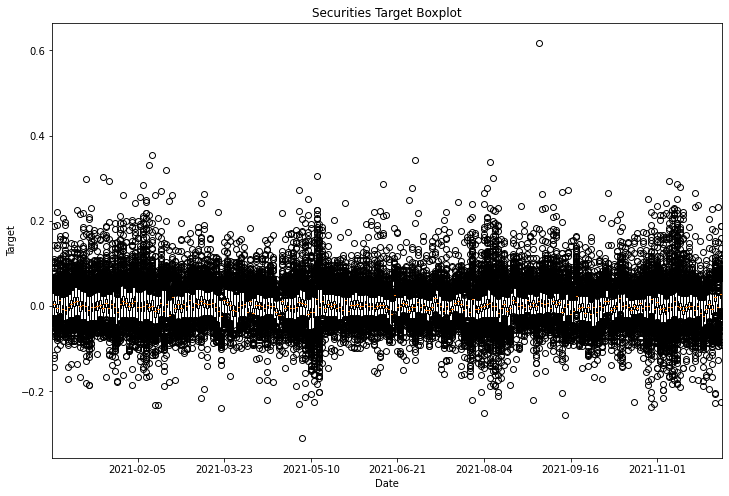

In [3]:
df_chrt = df.unstack().to_frame().reset_index()
df_chrt.rename(columns={0:"Target"}, inplace=True)

np.random.seed(10)
D = []
unique_dates = list(df_chrt['Date'].astype(str).unique())

for ud in unique_dates:
    D.append(df_chrt.loc[df_chrt['Date']==ud, "Target"].values)


fig, ax = plt.subplots(figsize=(12,8))
#ax.violinplot(D, widths=0.001,
#                   showmeans=True, showmedians=True, showextrema=True)
ax.boxplot(D)
ax.set_xticklabels(unique_dates)
loc = plticker.MultipleLocator(base=30.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_ylabel('Target') 
ax.set_xlabel('Date') 

plt.title("Securities Target Boxplot")
plt.show()

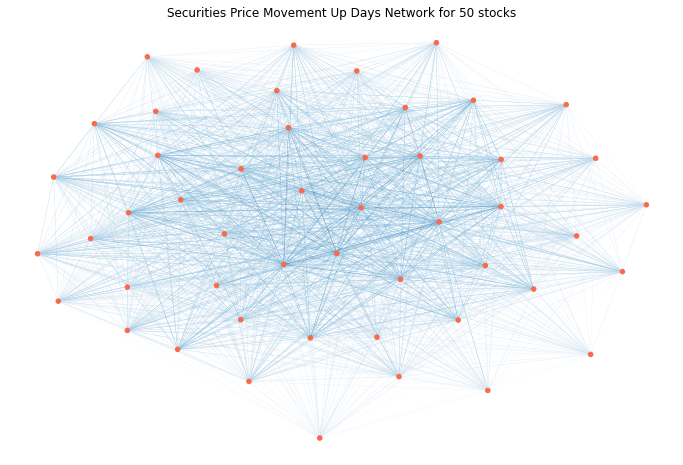

In [4]:
def generate_options(node_color, weights, edges):
    colors = plt.cm.Reds(np.linspace(0, 1, 9))
    color_codes = [colors[x] for x in node_color]
    options = {
        "node_color": color_codes,
        "node_size": 20,
        "width": 0.25,
        "edge_color": weights,
        "edgelist": edges, 
        "edge_cmap": plt.cm.Blues,
        "with_labels": False,
    }
    
    return options

def get_node_color():
    node_color = []
    for node in G.nodes():
        if G.degree(node) == 0:
            node_color.append(0)        
        elif G.degree(node) == 1:
            node_color.append(1)        
        elif G.degree(node) < 10:
            node_color.append(2)        
        elif G.degree(node) < 40:
            node_color.append(3)        
        elif G.degree(node) < 100:
            node_color.append(4)        
        elif G.degree(node) < 400:
            node_color.append(5)        
        elif G.degree(node) < 1000:
            node_color.append(6)        
        elif G.degree(node) < 1900:
            node_color.append(7)
        else:
            node_color.append(8)
            
    return node_color

def create_graph(colz):
    G = nx.Graph()

    
    colz

    for c in colz:
        G.add_node(c)

    for o in colz:
        for i in colz:
            if o==i:
                continue
            else:
                iter_mask = (df[o] > 0) * (df[i] > 0)
                iter_weight = df.loc[iter_mask == True, [o, i]].sum().sum()
                G.add_edge(o, i, weight=iter_weight)


    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    df_weights = (pd.DataFrame(np.array(list(zip(*nx.get_edge_attributes(G,'weight').items())), dtype=object).T, 
                               columns=['edge', 'weight']).sort_values(by=['weight'])).reset_index(drop=True)
    df_weights
    
    return G, edges, weights, df_weights


colz = list(df.columns)[:50]

G, edges, weights, df_weights = create_graph(colz)

mquantiles = [0.003, 0.05, 0.1, 0.2, 0.32, 0.5, 0.68, 0.8, 0.9, 0.95, 0.997, 0.999, 0.9999]
#mquantiles = [0.1, 0.9, 0.95]#, 0.997, 0.999, 0.9999]

colors = range(8)
node_color = get_node_color()       
options = generate_options(node_color, weights, edges)

plt.figure(figsize=(12,8))
plt.title("Securities Price Movement Up Days Network for 50 stocks")
nx.draw(G, **options)

del edges, weights, node_color, options
gc.collect();

In [5]:
def chart_cumulative_count(df_weights):
    chrt = alt.Chart(df_weights, title="Cumulative Count of Network Edge Weights").transform_window(
        cumulative_count="count()",
        sort=[{"field": "weight"}],
    ).mark_area().encode(
        x="weight:Q",
        y=alt.Y("cumulative_count:Q", title="Cumulative Count")
    ).properties(
        height=360,
        width=540
    ).configure_view(
        strokeWidth=0
    ).configure_axis(
        grid=False, 
        domain=False,
        labelFontSize=12,
        titleFontSize=16
    ).configure_title(
        fontSize=20
    )
    
    return chrt
    
    
chart_cumulative_count(df_weights)

alt.Chart(...)

In [6]:
#graph needs to be fully connected for this metric. Try running this before removing edges
def get_cfcc(G, df_securities):
    cfcc = nx.current_flow_closeness_centrality(G, weight="weight")
    df_securities = df_securities.merge(pd.DataFrame.from_dict(cfcc, orient='index'), how="left", left_on="SecuritiesCode", right_index=True)
    df_securities.rename(columns={0: "current_flow_closeness_centrality"}, inplace=True)
    
    ec = nx.eigenvector_centrality(G, weight="weight")
    df_securities = df_securities.merge(pd.DataFrame.from_dict(ec, orient='index'), how="left", left_on="SecuritiesCode", right_index=True)
    df_securities.rename(columns={0: "eigenvector_centrality"}, inplace=True)
    
    return df_securities


df_securities = get_cfcc(G, df_securities)
df_securities.head()

# include here as don't want an extra cell visible in the output and this cell won't need rerunning
env = jpx_tokyo_market_prediction.make_env()
iter_test = env.iter_test()

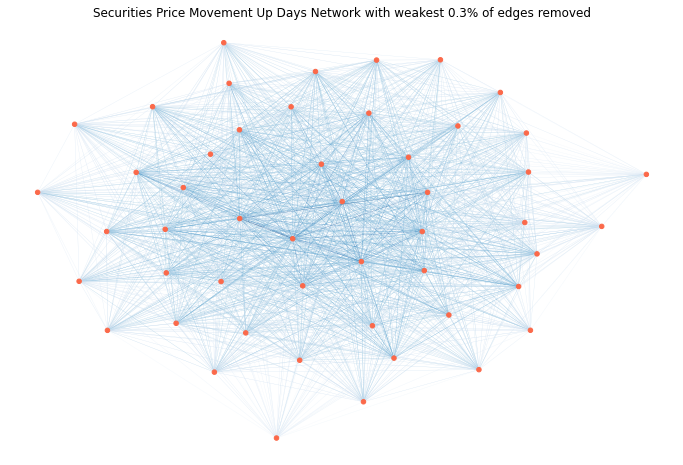

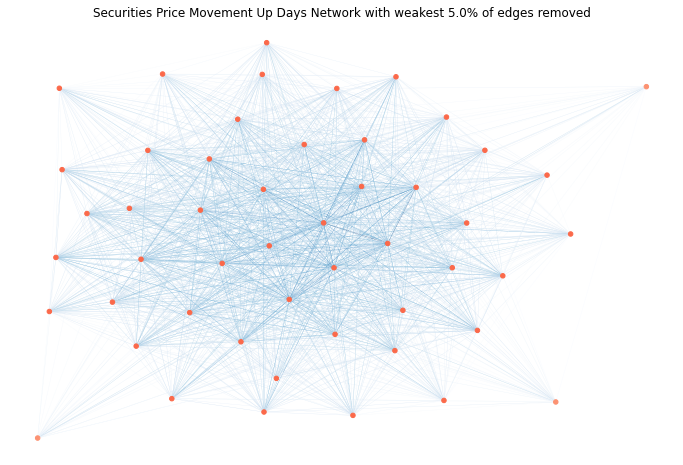

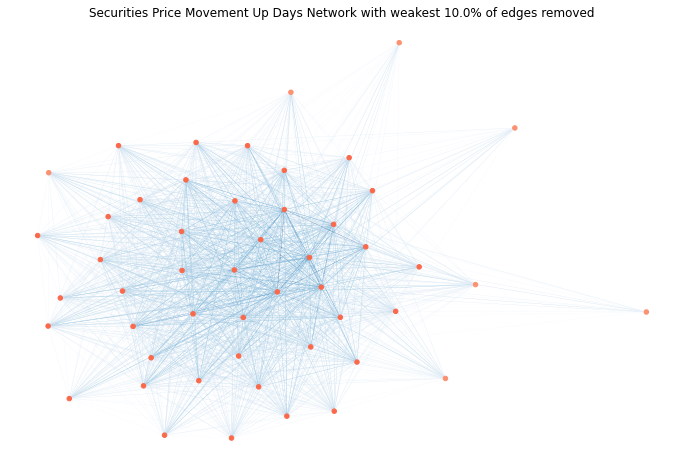

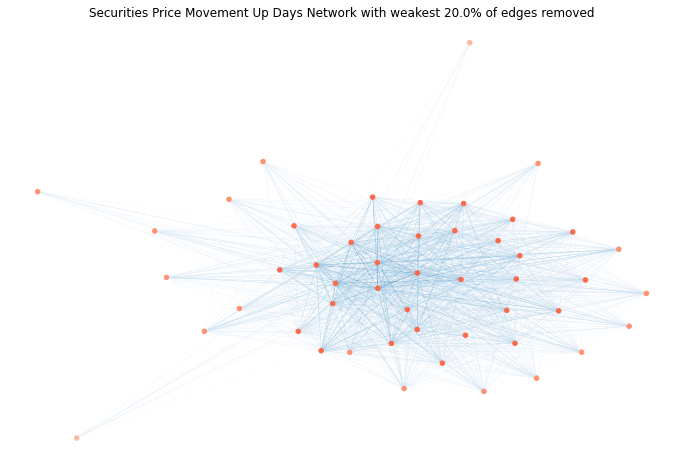

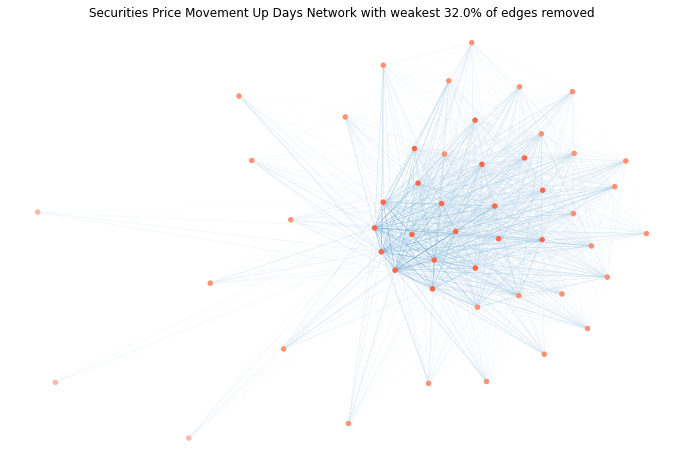

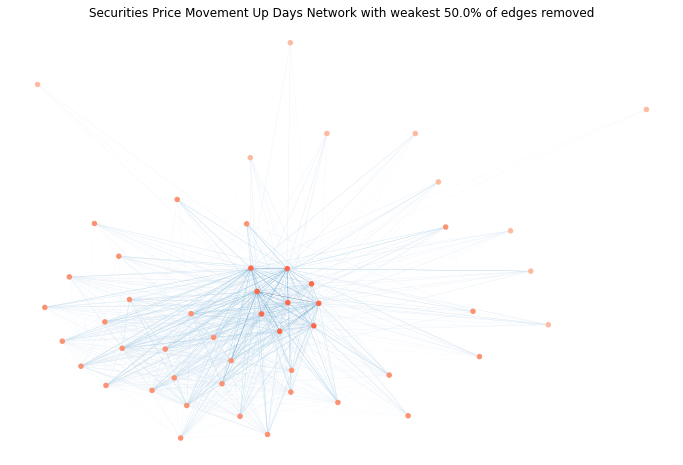

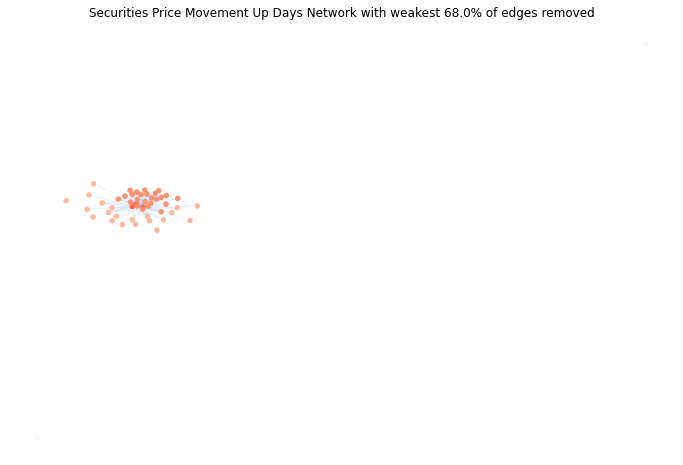

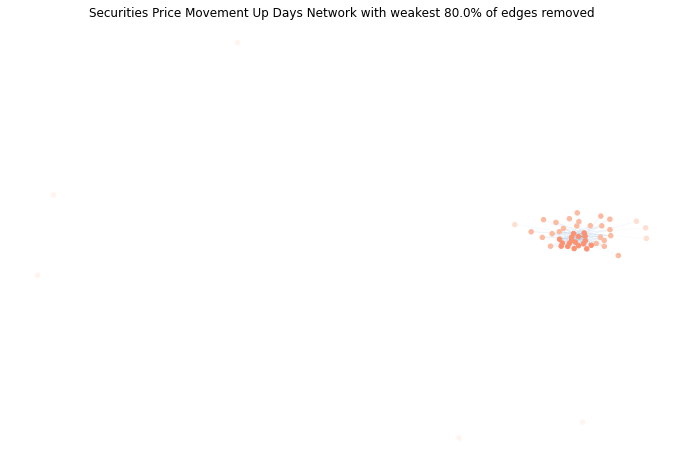

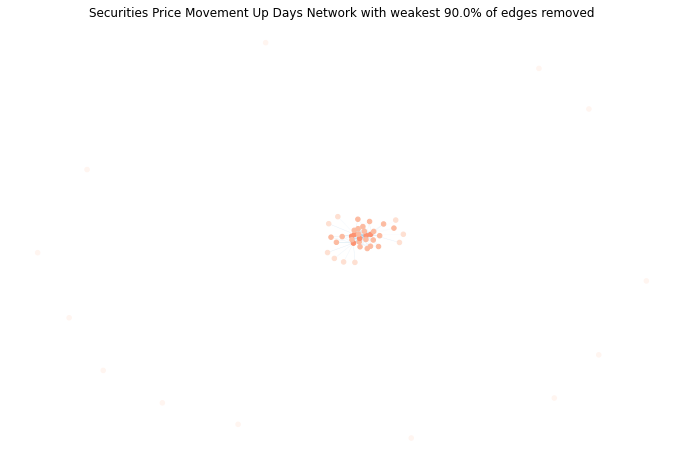

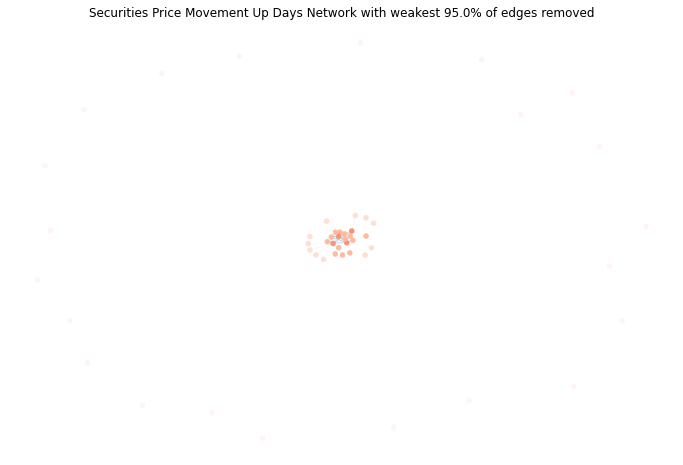

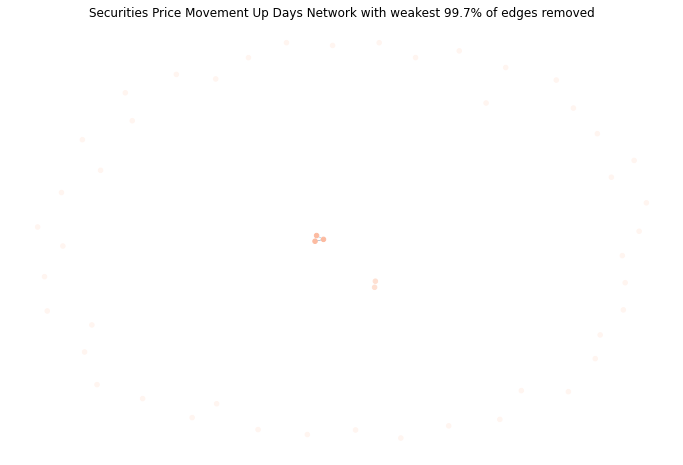

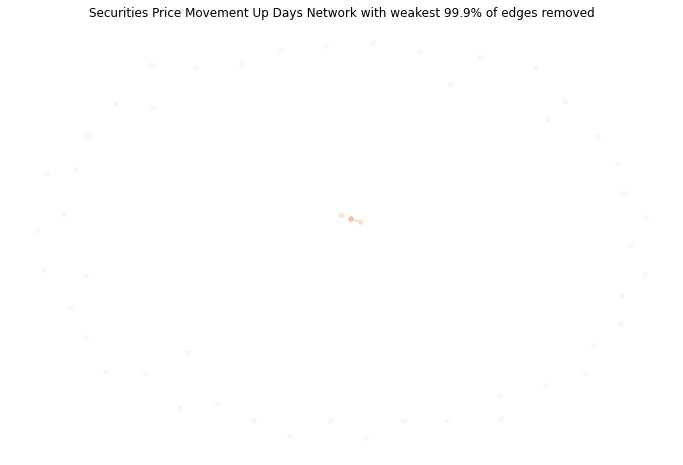

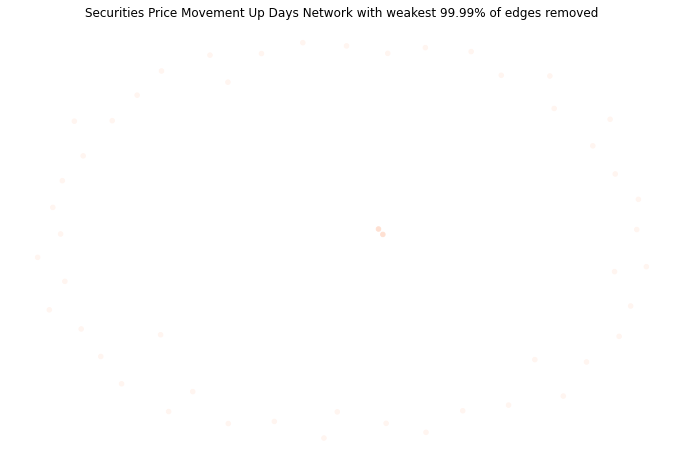

In [7]:
def paring_back_network(G, mquantiles, df_securities, show_viz=True):
    graph_list = [] # capture all graphs with deepcopy to make sure the variable isn't updated in the list when it is updated outside the list
    for m in range(len(mquantiles)):
        df_securities['gmc_' + str(m)] = "cat_0"

        remove = list(df_weights.loc[df_weights['weight'] < df_weights['weight'].quantile(mquantiles[m]), "edge"])
        len(remove)
        G.remove_edges_from(remove)
        graph_list.append(copy.deepcopy(G))

        c = community.greedy_modularity_communities(G, weight="weight")
        #sorted(c[0])

        for mc in range(len(c)):
            df_securities.loc[df_securities['SecuritiesCode'].isin(c[mc]), "gmc_" + str(m)] = "cat_" + str(mc)

        if show_viz:
            plt.figure(figsize=(12,8))
            plt.title("Securities Price Movement Up Days Network with weakest " + str(round(100 * mquantiles[m],3)) + "% of edges removed")
            
            edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
            node_color = get_node_color()       
            options = generate_options(node_color, weights, edges)

            nx.draw(G, **options)
            
            del edges, weights, node_color, options
            gc.collect();
        
    return G, df_securities, graph_list


G, df_securities, graph_list_50 = paring_back_network(G, mquantiles, df_securities)
gc.collect();

In [8]:
df_securities.head()

SecuritiesCode  current_flow_closeness_centrality  eigenvector_centrality  \
0            1301                           0.868905                0.117067   
1            1332                           0.984227                0.148935   
2            1333                           0.961772                0.142416   
3            1376                           0.879635                0.120147   
4            1377                           0.885660                0.121345   

   gmc_0  gmc_1  gmc_2   gmc_3   gmc_4   gmc_5  gmc_6   gmc_7   gmc_8   gmc_9  \
0  cat_1  cat_2  cat_4   cat_4   cat_8  cat_17  cat_2  cat_14  cat_10   cat_6   
1  cat_2  cat_3  cat_5  cat_11  cat_13   cat_8  cat_7   cat_5   cat_8   cat_7   
2  cat_3  cat_4  cat_6  cat_12   cat_1   cat_7  cat_7   cat_5   cat_4   cat_8   
3  cat_5  cat_6  cat_8   cat_0   cat_4   cat_1  cat_6   cat_3   cat_1  cat_10   
4  cat_6  cat_7  cat_0   cat_0   cat_2  cat_11  cat_6  cat_15  cat_11  cat_11   

  gmc_10 gmc_11 gmc_12  
0  cat_1  cat_0  cat_0  
1  cat_2  cat_1  cat_1  
2  cat_3  cat_2  cat_2  
3  cat_5  cat_4  cat_4  
4  cat_6  cat_5  cat_5

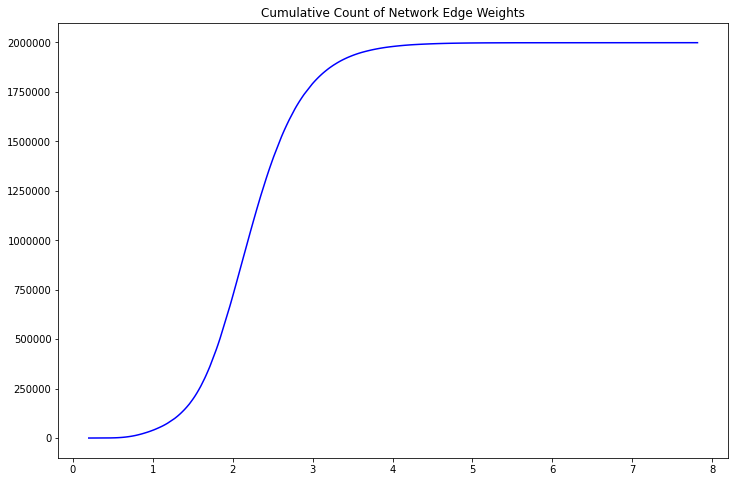

In [9]:
generate_full_graph = False

if generate_full_graph:
    # create graph
    colz = list(df.columns)
    G, edges, weights, df_weights = create_graph(colz)
    # save the full graph - in a later version we will load this rather than recalculating
    nx.write_gpickle(G, "fullgraph.gpickle")
else:
    G = nx.read_gpickle("../input/jpx-network-models-features/fullgraph.gpickle")
    # we need to save this back to the dataset because it gets overwritten by new runs of the notebook
    nx.write_gpickle(G, "fullgraph.gpickle")
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    df_weights = (pd.DataFrame(np.array(list(zip(*nx.get_edge_attributes(G,'weight').items())), dtype=object).T, 
                               columns=['edge', 'weight']).sort_values(by=['weight'])).reset_index(drop=True)


values, base = np.histogram(df_weights['weight'], bins=len(df_weights['weight']))
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.figure(figsize=(12,8))
plt.plot(base[:-1], cumulative, c='blue')
plt.title("Cumulative Count of Network Edge Weights")
plt.ticklabel_format(style='plain')

plt.show()

In [10]:
# prepare the first numeric features
df_securities = df_securities['SecuritiesCode'].to_frame()
df_securities = get_cfcc(G, df_securities)


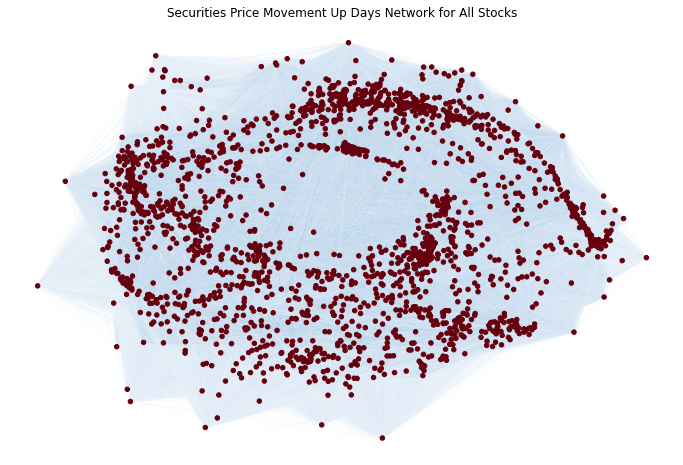

In [11]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
node_color = get_node_color()       
options = generate_options(node_color, weights, edges)
plt.figure(figsize=(12,8))
plt.title("Securities Price Movement Up Days Network for All Stocks")
nx.draw(G, **options)

del edges, weights, node_color, options
gc.collect();

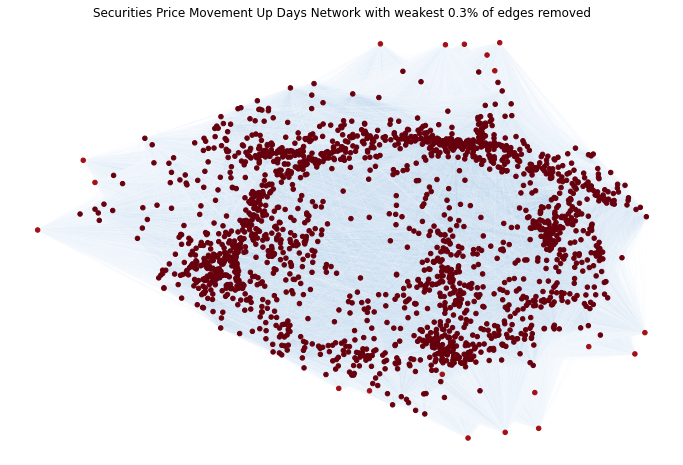

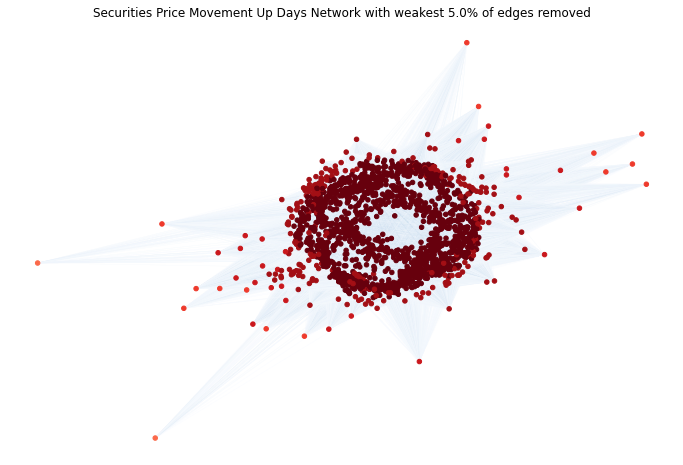

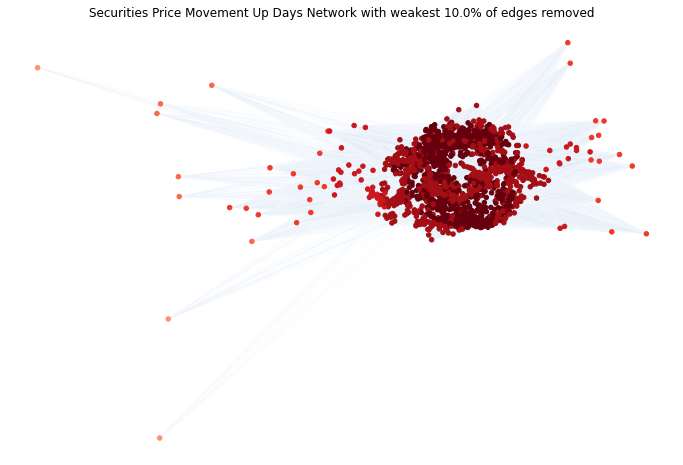

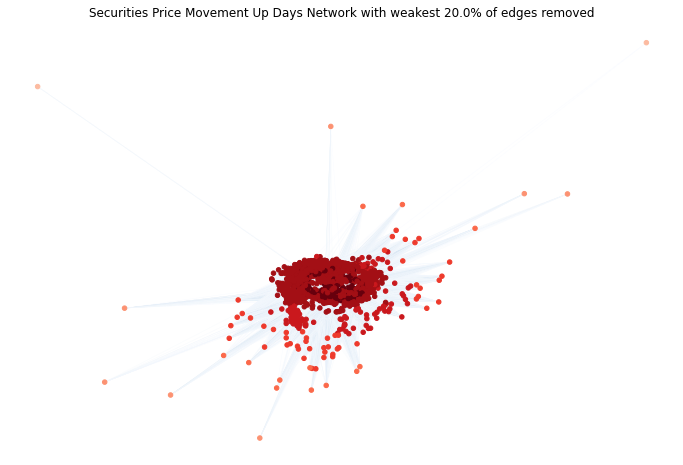

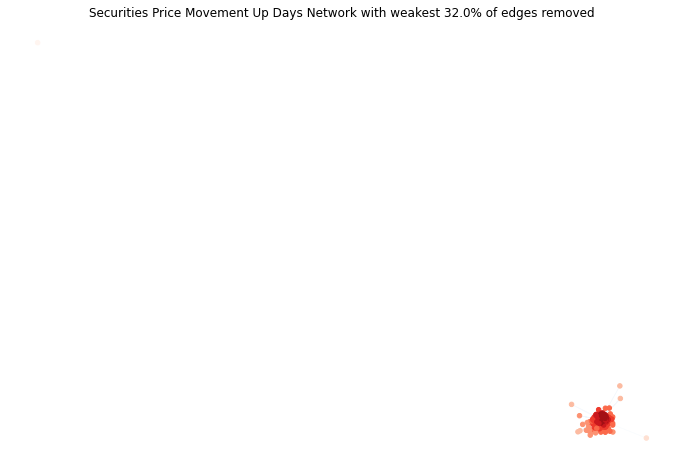

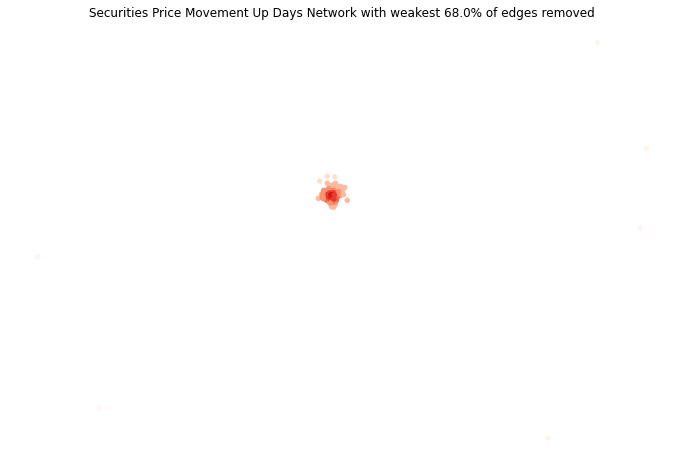

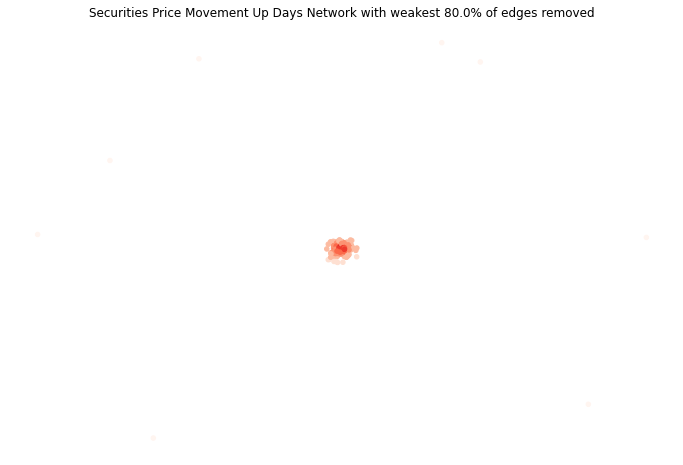

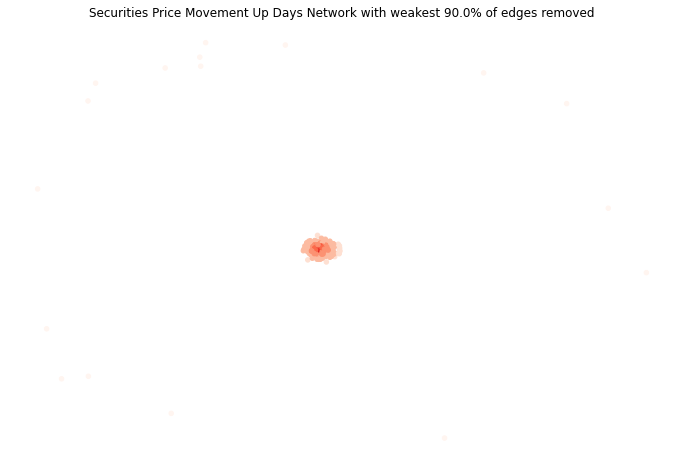

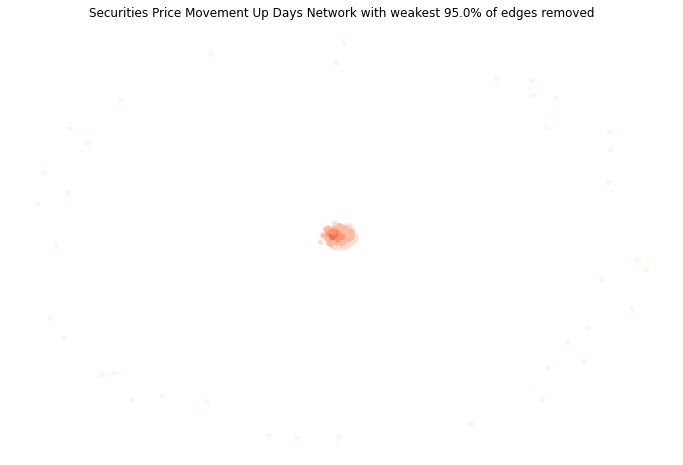

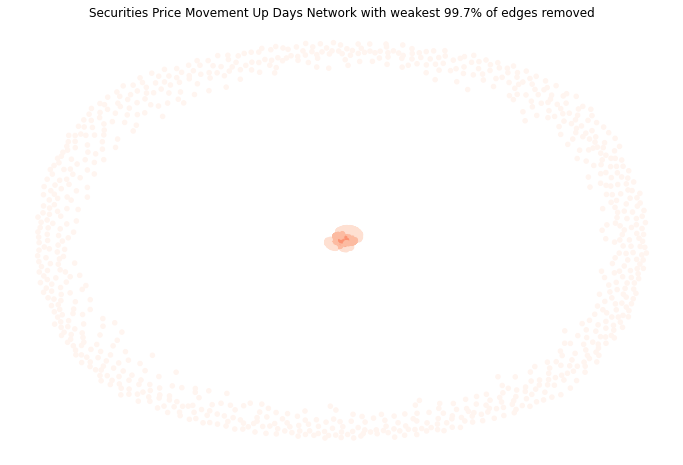

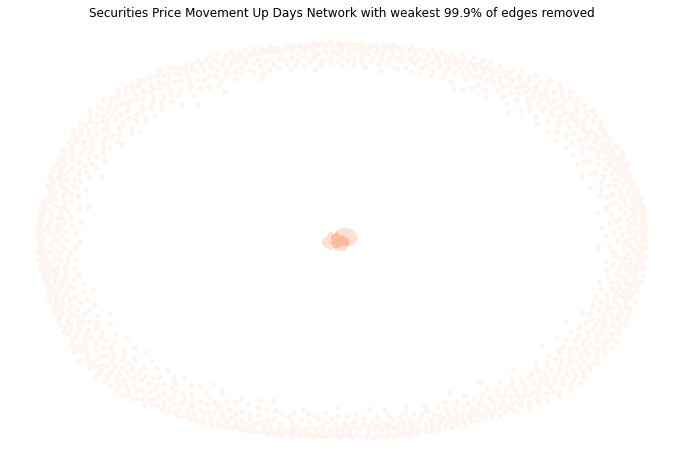

In [12]:
# prepare the community detection categorical features
G, df_securities, graph_list = paring_back_network(G, mquantiles, df_securities, show_viz=True)

In [13]:
df_securities.to_csv("network_features.csv", index=False)
df_securities

SecuritiesCode  current_flow_closeness_centrality  \
0                  1301                           0.965821   
1                  1332                           1.084530   
2                  1333                           1.055592   
3                  1376                           0.982348   
4                  1377                           0.979834   
...                 ...                                ...   
1863108            4167                           1.292647   
1865895            7358                           1.214734   
1867102            4168                           1.248061   
1867891            7342                           1.235287   
1869102            4169                           1.373036   

         eigenvector_centrality     gmc_0     gmc_1     gmc_2     gmc_3  \
0                      0.017330    cat_21    cat_73    cat_80   cat_188   
1                      0.021491    cat_22    cat_74   cat_129   cat_261   
2                      0.020411    cat_23    cat_75   cat_130   cat_262   
3                      0.017925    cat_25    cat_77   cat_132    cat_97   
4                      0.017758    cat_26    cat_78   cat_133    cat_92   
...                         ...       ...       ...       ...       ...   
1863108                0.031725   cat_537   cat_576   cat_589   cat_619   
1865895                0.027377  cat_1301  cat_1318  cat_1302  cat_1239   
1867102                0.029188   cat_538   cat_577   cat_590   cat_620   
1867891                0.028569  cat_1298  cat_1315  cat_1299  cat_1236   
1869102                0.037141   cat_539   cat_578   cat_591   cat_621   

            gmc_4    gmc_5    gmc_6    gmc_7    gmc_8    gmc_9  gmc_10  \
0         cat_189   cat_58  cat_114   cat_90    cat_9   cat_27   cat_0   
1         cat_380    cat_6   cat_74  cat_150   cat_45    cat_4  cat_54   
2         cat_110    cat_6  cat_403    cat_5   cat_39   cat_68   cat_0   
3          cat_99  cat_165  cat_163  cat_193  cat_146   cat_16  cat_56   
4         cat_150  cat_318  cat_375   cat_27  cat_291   cat_23  cat_57   
...           ...      ...      ...      ...      ...      ...     ...   
1863108   cat_653  cat_693  cat_646  cat_480  cat_181   cat_25  cat_40   
1865895   cat_357  cat_990  cat_762  cat_268  cat_204  cat_122  cat_35   
1867102   cat_654  cat_694  cat_563  cat_198   cat_65  cat_130  cat_23   
1867891  cat_1142  cat_987  cat_260  cat_552  cat_135  cat_169  cat_48   
1869102   cat_655   cat_70  cat_242    cat_9    cat_8    cat_7   cat_4   

         gmc_11    gmc_12  
0        cat_36    cat_11  
1        cat_37    cat_12  
2        cat_38    cat_13  
3        cat_40    cat_15  
4        cat_41    cat_16  
...         ...       ...  
1863108  cat_12     cat_8  
1865895   cat_1  cat_1339  
1867102  cat_12     cat_1  
1867891  cat_34  cat_1336  
1869102   cat_2     cat_1  

[2000 rows x 16 columns]

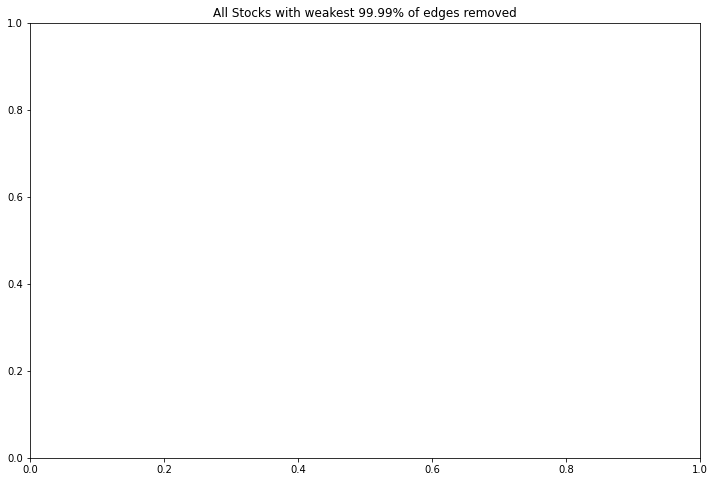

In [14]:
plt.figure(figsize=(12,8))
plt.title("All Stocks with weakest " + str(round(100 * mquantiles[-1],3)) + "% of edges removed")
nx.write_gpickle(G, "graph9999.gpickle")
G2 = nx.read_gpickle("graph9999.gpickle")
#nx.draw(G2, **options)

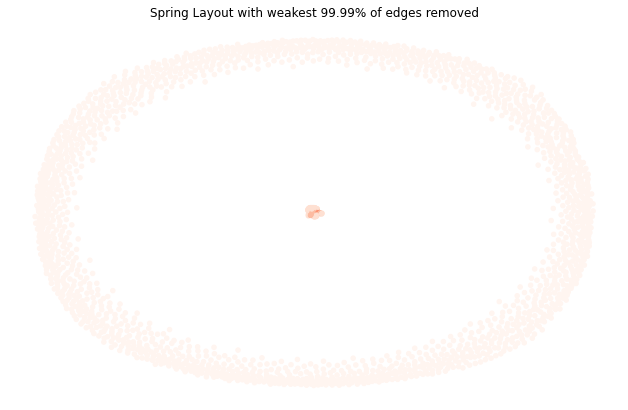

In [15]:
edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())
node_color = get_node_color()       
options = generate_options(node_color, weights, edges)

plt.figure(figsize=(11,7))
plt.title("Spring Layout with weakest " + str(round(100 * mquantiles[-1],3)) + "% of edges removed")
nx.draw(G2, pos=nx.spring_layout(G2), **options)

del edges, weights, node_color, options
gc.collect();

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
df_train = pd.read_csv("../input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv", parse_dates=['Date'])
df_securities = df_train['SecuritiesCode'].drop_duplicates().to_frame()
df_network_features = pd.read_csv("../input/jpx-network-models-features/network_features.csv")
df_train = df_train.merge(df_network_features, how="left", on="SecuritiesCode")
df_train = df_train.groupby(['SecuritiesCode'], as_index=False).apply(lambda group: group.ffill())    
df_train = df_train.groupby(['SecuritiesCode'], as_index=False).apply(lambda group: group.bfill()) 
excl_cols = ['Date', 'RowId', 'ExpectedDividend', 'ExpectedDividend', 'SupervisionFlag', 'Target']
cols = [c for c in df_train.columns if c not in excl_cols]
X = df_train.loc[df_train.Date>='2021-08-01', cols]
y = df_train.loc[df_train.Date>='2021-08-01', "Target"]
df_train.drop(columns=['Target'], inplace=True)

cat_cols = [c for c in cols if c[:3]=="gmc"]
le = preprocessing.LabelEncoder()
for c in cat_cols:
    X[c] = le.fit_transform(X[c])
    
regr = RandomForestRegressor(
    max_depth=5, 
    max_samples=0.75, 
    n_estimators=500, 
    n_jobs=-1, 
    random_state=1234, 
    oob_score=True
)
regr.fit(X, y)

RandomForestRegressor(max_depth=5, max_samples=0.75, n_estimators=500,
                      n_jobs=-1, oob_score=True, random_state=1234)

In [17]:
counter = 0
# The API will deliver six dataframes in this specific order:

for (prices, options, financials, trades, secondary_prices, sample_prediction) in iter_test:
    prices = prices.iloc[:,:11]
    prices = prices.merge(df_network_features, how="left", on="SecuritiesCode")
    current_date = prices['Date'].max()
    
    df_train = df_train.append(prices).reset_index(drop=True)
    df_train = df_train.groupby(['SecuritiesCode'], as_index=False).apply(lambda group: group.ffill())    
    df_train = df_train.groupby(['SecuritiesCode'], as_index=False).apply(lambda group: group.bfill()) 
    excl_cols = ['Date', 'RowId', 'ExpectedDividend', 'ExpectedDividend', 'SupervisionFlag', 'Target']
    cols = [c for c in df_train.columns if c not in excl_cols]
    X_test = df_train.loc[df_train.Date==current_date, cols]
    
    for c in cat_cols:
        X_test[c] = le.transform(X_test[c])
    
    y_pred = regr.predict(X_test)
    
    sample_prediction['Rank'] = y_pred
    sample_prediction["Rank"] = (sample_prediction["Rank"].rank(method="first", ascending=False)-1).astype(int).values
    
    assert sample_prediction["Rank"].notna().all()
    assert sample_prediction["Rank"].min() == 0
    assert sample_prediction["Rank"].max() == len(sample_prediction["Rank"]) - 1
    
    env.predict(sample_prediction)
    counter += 1
    
#print(counter)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
